In [58]:
import numpy as np
Vin = np.random.uniform(low=0.0, high=1.0, size=100)
G = np.random.uniform(low=10e-6, high=100e-6, size=100)
Gwire=0.1

Q1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


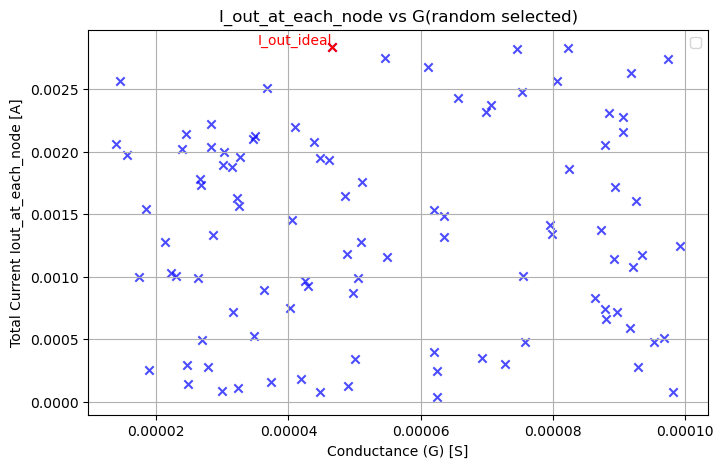

In [59]:
import matplotlib.pyplot as plt
I=Vin*G
I_node=np.cumsum(I)




max_y_value = I_node[-1]
max_x_value = G[-1]

# Plot results


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(G, I_node, color='blue', alpha=0.7,marker='x')
plt.scatter(max_x_value, max_y_value, color='red', zorder=5, marker='x')
plt.text(max_x_value, max_y_value, "I_out_ideal", fontsize=10, ha='right', va='bottom', color='red')
plt.xlabel('Conductance (G) [S]')
plt.ylabel('Total Current Iout_at_each_node [A]')
plt.title('I_out_at_each_node vs G(random selected)')
plt.legend()
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


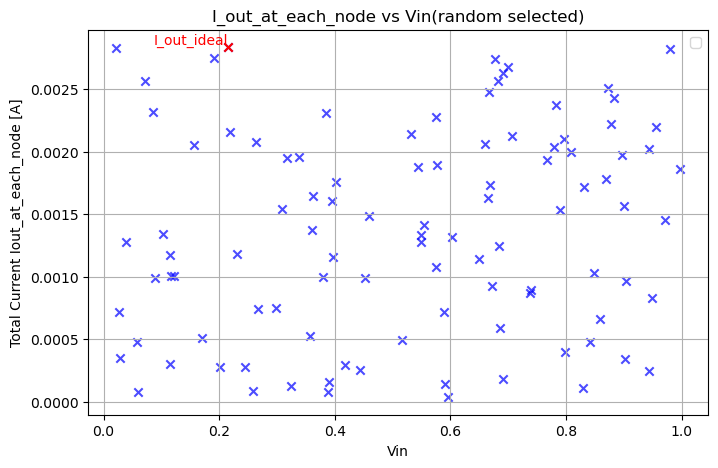

In [60]:

max_x_value = Vin[-1]

# Plot results


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(Vin, I_node, color='blue', alpha=0.7,marker='x')
plt.scatter(max_x_value, max_y_value, color='red', zorder=5, marker='x')
plt.text(max_x_value, max_y_value, "I_out_ideal", fontsize=10, ha='right', va='bottom', color='red')
plt.xlabel('Vin')
plt.ylabel('Total Current Iout_at_each_node [A]')
plt.title('I_out_at_each_node vs Vin(random selected)')
plt.legend()
plt.grid()
plt.show()

Q2

0.0012449922903271324


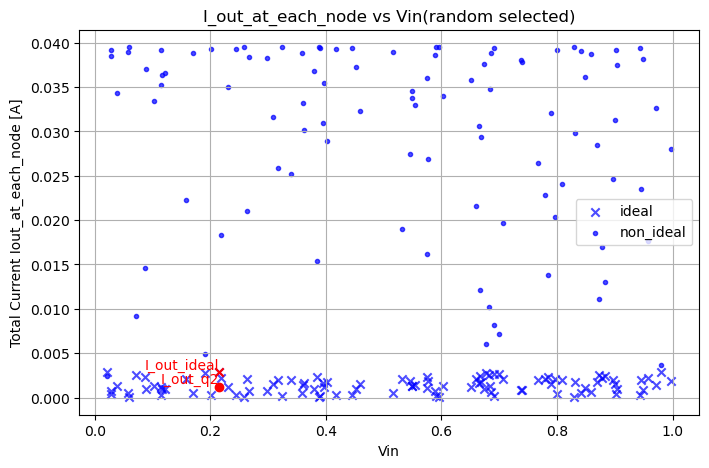

In [61]:
import numpy as np

def calc_Iout_b(Vin, G, Gwire,N=100):
    
    
    #solve A@V=b which explained in my handwritten
    A = np.zeros((N, N), dtype=float)
    b = np.zeros(N,     dtype=float)
    
   
    A[0, 0] = Gwire + G[0]
    A[0, 1] = -Gwire
    b[0]    = G[0]*Vin[0]
    
   
    for i in range(1, N-1):
        A[i, i-1] = -Gwire
        A[i, i  ] = 2*Gwire + G[i]
        A[i, i+1] = -Gwire
        b[i]      = G[i]*Vin[i]
    

   
    A[N-1, N-2] = -Gwire
    A[N-1, N-1] = 2*Gwire + G[N-1]

    b[N-1] = G[N-1]*Vin[N-1]
    

    V= np.linalg.solve(A, b)
    
    

    return V*Gwire

I_node_q2=calc_Iout_b(Vin, G, 0.1)
print(I_node_q2[-1])
max_y_value = I_node[-1]
max_x_value = Vin[-1]
max_y_value_2=I_node_q2[-1]

# Plot results


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(Vin, I_node, color='blue', alpha=0.7,marker='x',label='ideal')
plt.scatter(max_x_value, max_y_value, color='red', zorder=5, marker='x')
plt.scatter(Vin, I_node_q2, color='blue', alpha=0.7,marker='.',label="non_ideal")
plt.scatter(max_x_value, max_y_value_2, color='red', zorder=5)
plt.text(max_x_value, max_y_value, "I_out_ideal", fontsize=10, ha='right', va='bottom', color='red')
plt.text(max_x_value, max_y_value_2, "I_out_q2", fontsize=10, ha='right', va='bottom', color='red')
plt.xlabel('Vin')
plt.ylabel('Total Current Iout_at_each_node [A]')
plt.title('I_out_at_each_node vs Vin(random selected)')
plt.legend()
plt.grid()
plt.show()

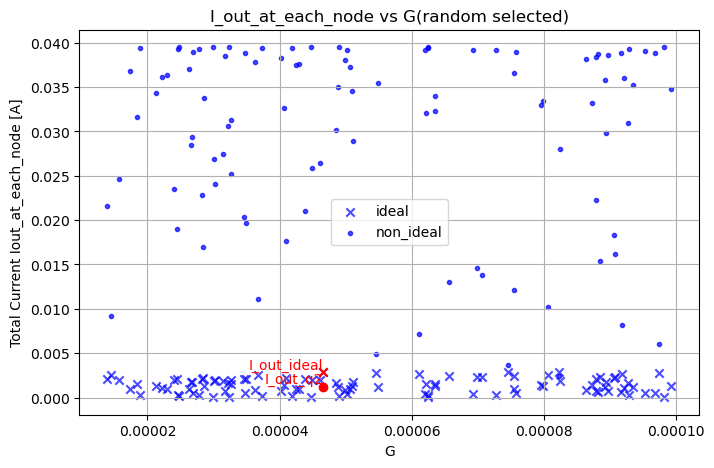

In [62]:
max_y_value = I_node[-1]
max_x_value = G[-1]
max_y_value_2=I_node_q2[-1]

plt.figure(figsize=(8, 5))
plt.scatter(G, I_node, color='blue', alpha=0.7,marker='x',label='ideal')
plt.scatter(max_x_value, max_y_value, color='red', zorder=5, marker='x')
plt.scatter(G, I_node_q2, color='blue', alpha=0.7,marker='.',label="non_ideal")
plt.scatter(max_x_value, max_y_value_2, color='red', zorder=5)
plt.text(max_x_value, max_y_value, "I_out_ideal", fontsize=10, ha='right', va='bottom', color='red')
plt.text(max_x_value, max_y_value_2, "I_out_q2", fontsize=10, ha='right', va='bottom', color='red')
plt.xlabel('G')
plt.ylabel('Total Current Iout_at_each_node [A]')
plt.title('I_out_at_each_node vs G(random selected)')
plt.legend()
plt.grid()
plt.show()

Q3

In [63]:
import numpy as np
import numpy as np

def calc_Iout_c_1(Vin, G, Gwire,N=100):
    
    
    #solve A@V=b which explained in my handwritten
    A = np.zeros((N, N), dtype=float)
    b = np.zeros(N,     dtype=float)
    
   
    A[0, 0] = Gwire + G[0]
    A[0, 1] = -Gwire
    b[0]    = G[0]*Vin[0]
    
   
    for i in range(1, N-1):
        A[i, i-1] = -Gwire
        A[i, i  ] = 2*Gwire + G[i]
        A[i, i+1] = -Gwire
        b[i]      = G[i]*Vin[i]
    

   
    A[N-1, N-2] = -Gwire
    A[N-1, N-1] = 2*Gwire + G[N-1]

    b[N-1] = G[N-1]*Vin[N-1]+Gwire*0.05
    

    V= np.linalg.solve(A, b)

    #print(V_N)
    
    return (V-0.05)*Gwire


def calc_Iout_c_2(Vin, G, Gwire,N=100):
    
    
    #solve A@V=b which explained in my handwritten
    A = np.zeros((N, N), dtype=float)
    b = np.zeros(N,     dtype=float)
    
   
    A[0, 0] = Gwire + G[0]
    A[0, 1] = -Gwire
    b[0]    = G[0]*Vin[0]
    
   
    for i in range(1, N-1):
        A[i, i-1] = -Gwire
        A[i, i  ] = 2*Gwire + G[i]
        A[i, i+1] = -Gwire
        b[i]      = G[i]*Vin[i]
    

   
    A[N-1, N-2] = -Gwire
    A[N-1, N-1] = 2*Gwire + G[N-1]

    b[N-1] = G[N-1]*Vin[N-1]
    

    V= np.linalg.solve(A, b)
    
    return V*Gwire


Gp=G*0.1/(G+0.1)
I_outc_1=calc_Iout_c_1(Vin,G,0.1)
I_outc_2=calc_Iout_c_2(Vin, Gp, 0.1)


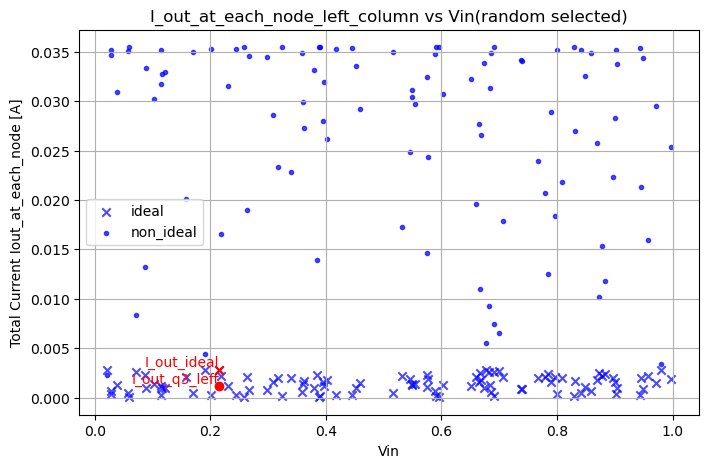

In [64]:
max_y_value = I_node[-1]
max_x_value = Vin[-1]
max_y_value_2=I_outc_1[-1]

# Plot results


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(Vin, I_node, color='blue', alpha=0.7,marker='x',label='ideal')
plt.scatter(max_x_value, max_y_value, color='red', zorder=5, marker='x')
plt.scatter(Vin, I_outc_1, color='blue', alpha=0.7,marker='.',label="non_ideal")
plt.scatter(max_x_value, max_y_value_2, color='red', zorder=5)
plt.text(max_x_value, max_y_value, "I_out_ideal", fontsize=10, ha='right', va='bottom', color='red')
plt.text(max_x_value, max_y_value_2, "I_out_q3_left", fontsize=10, ha='right', va='bottom', color='red')
plt.xlabel('Vin')
plt.ylabel('Total Current Iout_at_each_node [A]')
plt.title('I_out_at_each_node_left_column vs Vin(random selected)')
plt.legend()
plt.grid()
plt.show()

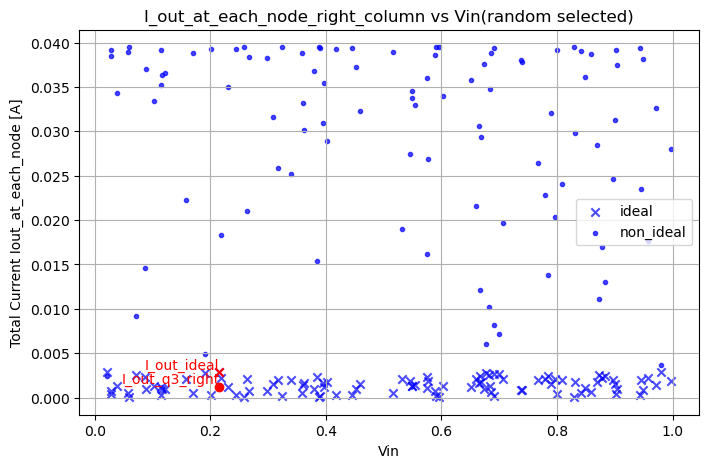

In [65]:
max_y_value_2=I_outc_2[-1]

# Plot results


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(Vin, I_node, color='blue', alpha=0.7,marker='x',label='ideal')
plt.scatter(max_x_value, max_y_value, color='red', zorder=5, marker='x')
plt.scatter(Vin, I_outc_2, color='blue', alpha=0.7,marker='.',label="non_ideal")
plt.scatter(max_x_value, max_y_value_2, color='red', zorder=5)
plt.text(max_x_value, max_y_value, "I_out_ideal", fontsize=10, ha='right', va='bottom', color='red')
plt.text(max_x_value, max_y_value_2, "I_out_q3_right", fontsize=10, ha='right', va='bottom', color='red')
plt.xlabel('Vin')
plt.ylabel('Total Current Iout_at_each_node [A]')
plt.title('I_out_at_each_node_right_column vs Vin(random selected)')
plt.legend()
plt.grid()

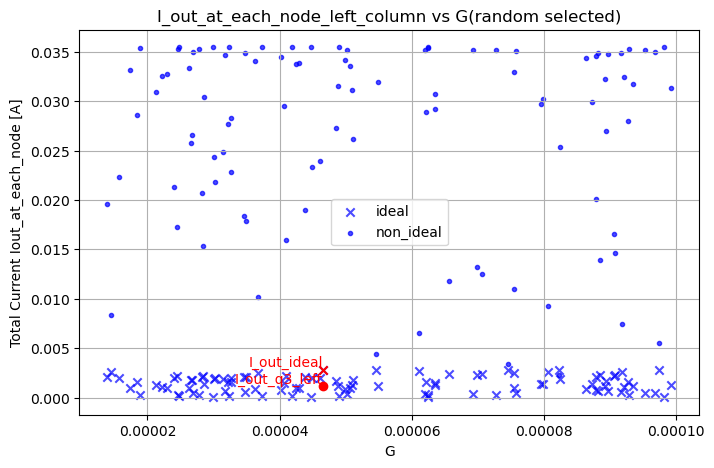

In [66]:
max_y_value = I_node[-1]
max_x_value = G[-1]
max_y_value_2=I_outc_1[-1]

plt.figure(figsize=(8, 5))
plt.scatter(G, I_node, color='blue', alpha=0.7,marker='x',label='ideal')
plt.scatter(max_x_value, max_y_value, color='red', zorder=5, marker='x')
plt.scatter(G, I_outc_1, color='blue', alpha=0.7,marker='.',label="non_ideal")
plt.scatter(max_x_value, max_y_value_2, color='red', zorder=5)
plt.text(max_x_value, max_y_value, "I_out_ideal", fontsize=10, ha='right', va='bottom', color='red')
plt.text(max_x_value, max_y_value_2, "I_out_q3_left", fontsize=10, ha='right', va='bottom', color='red')
plt.xlabel('G')
plt.ylabel('Total Current Iout_at_each_node [A]')
plt.title('I_out_at_each_node_left_column vs G(random selected)')
plt.legend()
plt.grid()
plt.show()

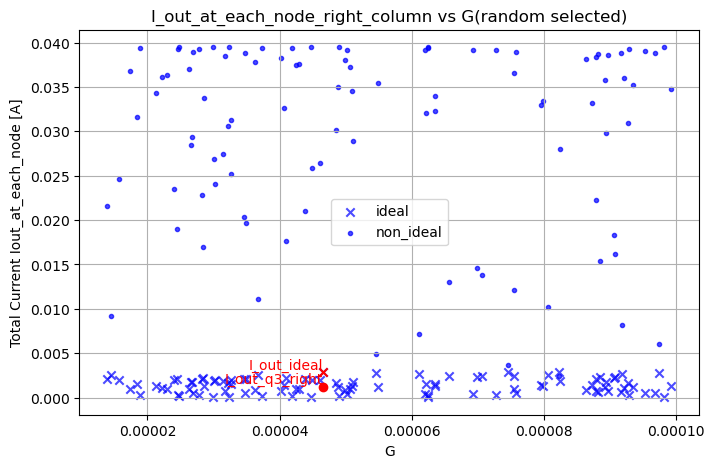

In [67]:
max_y_value_2=I_outc_2[-1]

plt.figure(figsize=(8, 5))
plt.scatter(G, I_node, color='blue', alpha=0.7,marker='x',label='ideal')
plt.scatter(max_x_value, max_y_value, color='red', zorder=5, marker='x')
plt.scatter(G, I_outc_2, color='blue', alpha=0.7,marker='.',label="non_ideal")
plt.scatter(max_x_value, max_y_value_2, color='red', zorder=5)
plt.text(max_x_value, max_y_value, "I_out_ideal", fontsize=10, ha='right', va='bottom', color='red')
plt.text(max_x_value, max_y_value_2, "I_out_q3_right", fontsize=10, ha='right', va='bottom', color='red')
plt.xlabel('G')
plt.ylabel('Total Current Iout_at_each_node [A]')
plt.title('I_out_at_each_node_right_column vs G(random selected)')
plt.legend()
plt.grid()
plt.show()

In [68]:
print(I_outc_1[-1],I_outc_2[-1])
print(I_node[-1])

0.001128548958518196 0.0012445156038333217
0.0028368335459289947
